In [1]:
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv( "../../newSemana.csv" , encoding ="utf-8")

In [3]:
df.shape

(8556, 3)

In [4]:
df.head()

Unnamed: 0                                            article  \
0           0  \r\n Fueron ocho las personas condenadas este ...   
1           1  \r\n                             Noviembre de ...   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...   

                       dates  
0      | 4/9/2015 9:00:00 PM  
1         | 2015/11/20 16:00  
2    | 1/30/2014 10:03:47 PM  
3    | 6/15/2016 10:29:00 PM  
4   | 11/22/2014 10:00:00 PM

In [5]:
df["dates"] = df["dates"].apply(lambda x : x.replace("|" , "") )

#df["dates"] = df["dates"].apply(lambda x : x.replace(" " , "") )
df["dates"] = df["dates"].apply(lambda x : x.split(" ")[2] )

In [6]:
df.head()

Unnamed: 0                                            article       dates
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015
1           1  \r\n                             Noviembre de ...  2015/11/20
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014

In [7]:
df.loc[ : , "date"] = pd.to_datetime( df["dates"] , format = "%m/%d/%Y" , errors='coerce' )

In [8]:
df.head()

Unnamed: 0                                            article       dates  \
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015   
1           1  \r\n                             Noviembre de ...  2015/11/20   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014   

        date  
0 2015-04-09  
1        NaT  
2 2014-01-30  
3 2016-06-15  
4 2014-11-22

In [9]:
df = df.dropna( subset = ["date"])

In [10]:
df.head()

Unnamed: 0                                            article       dates  \
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014   
5           5  \r\n Desde julio de 2013, Claro, Movistar, Tig...   10/2/2014   

        date  
0 2015-04-09  
2 2014-01-30  
3 2016-06-15  
4 2014-11-22  
5 2014-10-02

In [11]:

gp = df.groupby( by = ["date"] )["article"].count().reset_index()

In [12]:
gp = gp.set_index( "date" )


In [13]:
 df2 = gp.groupby(  pd.Grouper(freq='M')  ).count()

In [14]:
df2.tail()

article
date               
2018-06-30       30
2018-07-31       25
2018-08-31       31
2018-09-30       29
2018-10-31       26

In [15]:
import matplotlib.pyplot as plt

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
print (__version__) # requires version >= 1.9.0


init_notebook_mode(connected=True)

2.7.0


In [16]:
df2 = df2.reset_index()

In [17]:
df2.head()

date  article
0 1980-12-31        1
1 1981-01-31        0
2 1981-02-28        0
3 1981-03-31        0
4 1981-04-30        0

In [18]:

trace = go.Scatter( 
    x = df2["date"] , 
    y = df2["article"] , 
    name = " # Articulos por mes"
)
layout = go.Layout(
    title = "# Articulos por mes", 
    xaxis = dict(
        title = "Meses"
    ) , 
    yaxis = dict(
        title = "#"
    )
)
fig = go.Figure( data = [trace] , layout =  layout )
iplot( fig )

In [19]:
df.head()

Unnamed: 0                                            article       dates  \
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014   
5           5  \r\n Desde julio de 2013, Claro, Movistar, Tig...   10/2/2014   

        date  
0 2015-04-09  
2 2014-01-30  
3 2016-06-15  
4 2014-11-22  
5 2014-10-02

In [20]:
df.loc[: , "len"] = df["article"].apply( lambda x : len(x))

In [21]:
df.head()

Unnamed: 0                                            article       dates  \
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014   
5           5  \r\n Desde julio de 2013, Claro, Movistar, Tig...   10/2/2014   

        date   len  
0 2015-04-09  5341  
2 2014-01-30   946  
3 2016-06-15  4979  
4 2014-11-22  2317  
5 2014-10-02  3482

In [22]:
gp = df.groupby( by = ["date"] )["len"].sum().reset_index()
gp = gp.set_index( "date" )
df2 = gp.groupby(  pd.Grouper(freq='D')  ).sum()

df2 = df2.reset_index()
df2.head()

date    len
0 1980-12-11  15187
1 1980-12-12      0
2 1980-12-13      0
3 1980-12-14      0
4 1980-12-15      0

In [23]:
trace = go.Scatter( 
    x = df2["date"] , 
    y = df2["len"] , 
    name = " # Caracteres por mes"
)
layout = go.Layout(
    title = "# Caracteres por mes", 
    xaxis = dict(
        title = "Meses"
    ) , 
    yaxis = dict(
        title = "#"
    )
)
fig = go.Figure( data = [trace] , layout =  layout )
iplot( fig )

In [24]:
df.head()

Unnamed: 0                                            article       dates  \
0           0  \r\n Fueron ocho las personas condenadas este ...    4/9/2015   
2           2  \n\n\n 1.\tOprima en la parte inferior derecha...   1/30/2014   
3           3  \nCuando Néstor Humberto Martínez intentó conv...   6/15/2016   
4           4  \nSEMANA: ¿Qué es la novela negra?\n\nRudolf H...  11/22/2014   
5           5  \r\n Desde julio de 2013, Claro, Movistar, Tig...   10/2/2014   

        date   len  
0 2015-04-09  5341  
2 2014-01-30   946  
3 2016-06-15  4979  
4 2014-11-22  2317  
5 2014-10-02  3482

In [25]:

df18 = df[  df["date"].dt.year == 2018 ]

In [26]:
df18.shape

(1576, 5)

In [27]:
df18.head()

Unnamed: 0                                            article      dates  \
8            8  \nLa participación comunitaria es clave en el ...   5/9/2018   
10          10  \nDesde hace algunos años, y a raíz de la situ...   5/5/2018   
16          16  \nEl Instituto de Vulcanología de Guatemala (I...   6/6/2018   
18          18  \nEste domingo fue un mal día para Iago Aspas,...   7/2/2018   
19          19  \nEl anuncio de la restricción del parrillero ...  1/25/2018   

         date   len  
8  2018-05-09  2293  
10 2018-05-05  6199  
16 2018-06-06  4386  
18 2018-07-02   959  
19 2018-01-25  8062

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
def remove_stopwords(sentence, language):
    return [ token for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words(language) ]

[nltk_data] Downloading package punkt to /home/afhuertas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/afhuertas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:

texts = []
for i in range( 1 , 13):
    dfm = df18[ df18["date"].dt.month == i  ]
    dfm["article"] = dfm["article"].apply( lambda x : x.replace( "\n" , ""))
    dfm["article"] = dfm["article"].apply( lambda x : x.lower()  )
    #dfm["article"] = dfm["article"].apply( lambda x : remove_stopwords( x , "spanish")  )
    textM = " ".join( dfm["article"].values) 
    texts.append( remove_stopwords( textM , "spanish" ) )
    print(textM)
    

/home/afhuertas/data-science/env-sonnet/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/afhuertas/data-science/env-sonnet/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 — provea (@_provea) 15 de enero de 2018un manto de duda se tendió sobre lo ocurrido en los allanamientos y enfrentamientos. los medios de comunicación no pudieron ingresar a la zona. incluso horas después de que terminó el operativo no se tenía la certeza de si los miembros del grupo rebelde estaba vivo o muerto. los familiares pedían la verdad y el gobierno venezolano callaba. 24 horas después de lo sucedido el ministro del interior, néstor reverol, confirmó lo que era un secreto a voces: óscar pérez estaba muerto, y junto a él otros cinco rebeldes.en contexto: herido y acorralado: así está el piloto de helicóptero que atacó corte suprema en venezuelalas organizaciones de derechos humanos manifestaron su preocupación por lo sucedido. aunque pérez era un policía sublevado que atacó al parlamento desde un helicóptero, tenía derecho al debido proceso. provea, una organización de derechos humanos con amplia trayectoria, advirtió desde el primer momento las extralimitaciones de las autori

 — álvaro uribe vélez (@alvarouribevel) february 18, 2018a su juicio, es un "peregrino argumento" considerar que las visitas de cepeda a exparamilitares para recabar sus testimonios "se enmarcan dentro de las funciones de una comisión de derechos humanos de la cámara", tal y como decidió el alto tribunal. por eso recuerda que su "denuncia probó que una ong, cercana al congresista, hizo pagos a familiares de testigos"."pero, infortunadamente, para la corte en este caso, y para la fiscalía en otros, eso no es manipulación sino ‘protección humanitaria‘; descarada impunidad", asegura uribe. además, agrega que "se han dado casos de personas que quieren declarar en nuestro favor y en la fiscalía les preguntan si nos van a acusar".finalmente, el hoy senador por el centro democrático pide a la corte que publique las llamadas que le interceptó con el abogado para que la ciudadanía examine si cometió delito alguno y enseguida advierte que conservará su número telefónico, mientras sigue en busca 

la investigación por los supuestos sobornos pagados en españa a través de canal de isabel ii, la prestadora del servicio de acueducto en españa, despegó en colombia. la fiscalía capturó en barranquilla a ramón navarro, quien fue por 11 años el presidente de la triple a, una de las filiales en el país de la gigante de aguas en españa. junto con él, será llevada ante un juez julia margarita serrano monsalve, exgerente financiera de la firma.hace un año, el escándalo fue bautizado al otro lado del atlántico como operación lezo y provocó la captura del expresidente de la comunidad de madrid (2013 – 2015), ignacio gonzález. a él se le acusa de graves delitos por corrupción en los negocios del canal de isabel ii y sus empresas filiales en latinoamérica, entre las cuales se encuentran cuatro compañías de servicios públicos con sede en barranquilla, santa marta y riohacha.canal de isabel ii extendió su operación a latinoamérica por medio de canal extensia, que a su vez adquirió el 81.24 por ci

la campaña presidencial está llegando a su punto más definitivo. el debate caribe demostró que los ánimos están subiendo y que vienen más pullas y sablazos que antes. después de ese encuentro, los candidatos vivieron otro tiempo en las redes sociales, en especial en twitter, allí entre ellos continuaron la discusión.uno de los trinos que más impacto ha tenido es uno de gustavo petro en el que publica un video. allí se puede ver al candidato iván duque cantando con emoción ‘la gota fría’ juanto a poncho zuleta. al final se escucha un grito supuestamente del cantante vallenato: “el 27 de mayo le cayó la gota fría... viva la tierra paramilitar”. duque lo abraza.petro acompañó su trino con un mensaje. “sabes qué? ?@ivanduque? no festejes en mi tierra los triunfos paramilitares de tu séquito, sólo saben a sabor de cocaína y genocidio”.sabes qué? @ivanduque no festejes en mi tierra los triunfos paramilitares de tu séquito, sólo saben a sabor de cocaína y genocidio. pic.twitter.com/dcuqm8htud

la participación comunitaria es clave en el desarrollo de una ciudad. por eso, desde 2016 la alcaldía de montería mantiene un acercamiento constante con los ciudadanos para poner la oferta institucional al alcance de ellos a través del programa mi barrio. de ese modo, un sábado de cada mes se traslada a un barrio. allí todas las secretarías y sus funcionarios, instalados en carpas, resuelven dudas de la comunidad, reciben solicitudes y hacen trámites e informan acerca de programas y el avance de los proyectos.esta iniciativa tiene dos partes: atender las nueve comunas urbanas y llegar hasta la zona rural, compuesta por 28 corregimientos. en 2017 visitó 113 barrios urbanos y 16 corregimientos, y siempre contó con el apoyo de aliados estratégicos como universidades, empresas de servicios públicos y corporaciones técnicas, entre otros, con el fin de solucionar los problemas de las comunidades muy pronto.adsdisplay('robapagina_mobile');  if (adsiteminsection) { adsdisplay('in_text'); }  ci

el instituto de vulcanología de guatemala (insivumeh) aseguró que este miércoles se han registrado varias explosiones débiles, en un rango de 4 a 5 por hora, que generan una columna gris de ceniza a 4.700 metros de altura."las explosiones generan avalanchas moderadas que tienen un recorrido aproximado de 800 a 1.000 metros y en su trayecto levantan material fino a una altura de unos 100 metros", agregó la institución en un reporte."persiste la ceniza en el ambiente", sentenció.en imágenes: la erupción del volcán fuego en guatemalael pasado domingo, el volcán registró la erupción más fuerte en los últimas cuatro décadas, que ya cobró la vida de 75 personas mientras que 192 están desaparecidas tras desatar una avalancha de material volcánico que sepultó a comunidades del poblado sureño de escuintla. también dejó 44 personas heridas, 12.089 evacuadas de las cuales 3.319 fueron llevadas a albergues, según precisa un balance dado este miércoles por la coordinadora para la reducción de desas

este domingo fue un mal día para iago aspas, el mediocampista de la selección de españa que dilapidó el último penalti de la tanda contra rusia y que les significó la eliminación a los ibéricos. aspas es recordado por haber cometido en la liga española actos racistas en contra del colombiano jefferson lerma, quien justamente ahora se encuentra concentrado en rusia con la selección colombia. al final de un partido entre el levante y el celta, lerma no aguantó y dijo: “quiero hacer una denuncia, creo que estos actos de racismo no pueden existir. creo que aspas me ha dicho ‘negro de mierda’, y eso no puede pasar”, dijo el talentoso lerma. aspas, quien en otro partido contra el barcelona insultó a yerry mina, no recibió ningún tipo de sanción. aquella vez con el barcelona, aspas se acercó a mina, que estaba en el suelo, y le lanzó varias palabras de grueso calibre.adsdisplay('robapagina_mobile');  if (adsiteminsection) { adsdisplay('in_text'); }    entre los barrios de bello (al norte de m

aunque gustavo petro alcanzó una curul como senador por haber obtenido la segunda votación en las elecciones presidenciales, el consejo nacional electoral le negó el derecho a su movimiento colombia humana de obtener la personería jurídica como partido político. este martes la sala plena del cne negó la ponencia del magistrado armando novoa con una votación de 6 contra 2.el @cne_colombia decidio en votación de hoy (6-2), negar personeria juridica de @colombiahumana_ .— armando novoa garcía (@consejeronovoa) 28 de agosto de 2018"la sala plena de la corporación ha resuelto denegar el proyecto de resolución propuesto por el honorable magistrado armando novoa garcía, respecto de la personería del grupo significativo de ciudadanos colombia humana. en consecuencia, le corresponde al honorable magistrado emiliano rivera bravo redactar un nuevo proyecto de resolución para su estudio y aprobación por parte de la sala plena", informó el cne por medio de un comunicado.novoa le había pedido al cne

el viernes pasado iván duque cumplió un mes al frente de la presidencia. en términos políticos, la gran pregunta sobre el inicio de su mandato ha sido la gobernabilidad. con una popularidad que ronda el 40 por ciento, una agenda cargada de temas complejos y la promesa de no entregarles puestos a los congresistas –acabar la ‘mermelada’–, el gobierno ha enfrentado el principal dilema de cómo manejar una relación fluida con el legislativo. a eso se suma el reto de estrenar un estatuto de la oposición que impone nuevas dinámicas políticas, al obligar a los parlamentarios a declararse gobiernistas, independientes o de oposición.para leer este artículo completo:suscríbaseingreseeste contenido hace parte de nuestra edición impresa: exclusiva para suscriptores.  al mundo le quedan solamente dos años para actuar contra el cambio climático si quiere evitar "consecuencias desastrosas", advirtió el lunes el jefe de la onu, antonio guterres, llamando a la sociedad civil a pedir "cuentas" a los líde

la ciencia que investiga el mindfulness publica casi a diario el resultado de un nuevo estudio donde un grupo de investigadores, en alguna parte del mundo, comprueba una vez más que la meditación, gracias a que modifica la estructura y el funcionamiento del cerebro, reduce el estrés, aumenta la concentración, mejora las relaciones interpersonales, mejora el funcionamiento del sistema inmunológico, reduce el dolor y ayuda a lidiar con enfermedades crónicas, incluidas la ansiedad y la depresión. pero, ¿cuál es el tiempo mínimo diario  para obtener resultados? la contra-pregunta que me surge en estos casos es: ¿qué resultados quieres obtener?en el mundo agitado de hoy donde  se desenvuelven hoy muchos ejecutivos, hombres y mujeres de negocios o profesionales independientes, ¡incluso estudiantes! con altas metas que cumplir y elevadas exigencias tanto en sus vidas profesionales como familiares, la forma como utilizan el tiempo es un factor clave para la obtención de cualquier logro. alguno

In [30]:
len( texts )

12

In [31]:
len( texts[0] )

84577

In [32]:
from wordcloud import WordCloud
k = 0

In [33]:
l = " ".join( texts[k])

import collections
counter = collections.Counter(texts[k])

In [34]:
most = []
for i in counter.most_common(100):
    most.append( i[0] )

most.append("adsdisplay")
most.append("adsitem")
most.append("in_text")
most.append("semana")
most.append("la")
most.append("el")

In [35]:
l = [   x for x in texts[k] if x not in most ]

In [36]:
import collections
counter = collections.Counter(  l )

In [37]:
#counter.most_common(1000)

In [38]:
text = " ".join( l )

In [39]:
wordcloud = WordCloud().generate(text)

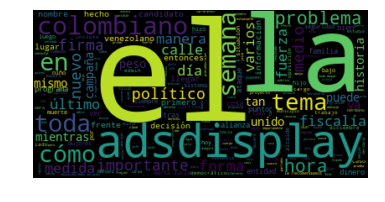

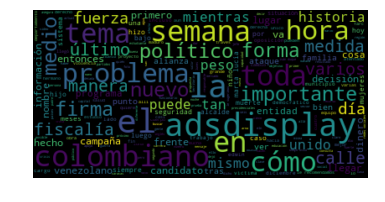

In [40]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

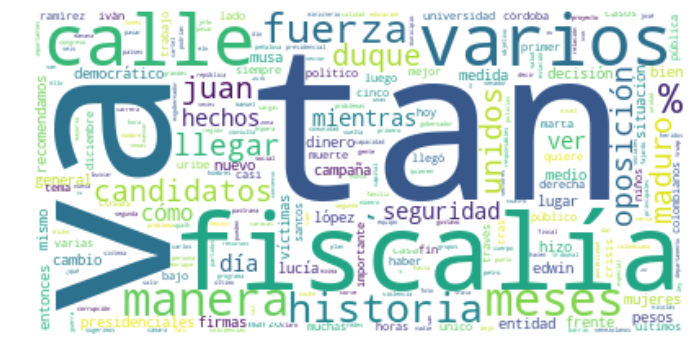

In [43]:
import multidict as multidict
import re
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):


    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
makeImage(getFrequencyDictForText(text))